###Chapter 6
---
#**Odds and Addends**

##**Odds**
---
One way to represent probability is with anumber between 0 and 1, but that's not the only way. If you  have ever bet on a footballl game or a horse race, you have probably encountered another representation of probabiliy called **odds**.


You might have heard expressions like "the odds are three to one", but you might not know what that means. The odds in favour of an event are the ratio of the probability it will occur to the probability that it will not.
The following function does this calculation:

In [ ]:
def odds(p):
  return p/(1-p)

For example, if my team has a 75% chance of winning, the odds in their favor are three to one, because the chance of winning is three times the chance of losing.

In [ ]:
odds(0.75)

3.0

You can write odds in decimal form, but it is also common to write them as a ratio of integers. So “three to one” is sometimes written 3:1 (three is to one).

When probabilities are low, it is more common to report the odds against rather than the odds in favor. For example, if my horse has a 10% chance of winning, the odds in favor are 1:9 (one is to nine).

In [ ]:
odds(0.1)

0.11111111111111112

But in that case it would be more common I to say that the odds against are 9:1.

In [ ]:
odds(0.9)

9.000000000000002

Given the odds in favor, in decimal form, you can convert to probability like this:

In [ ]:
def prob(o):
    return (o / (o+1))

For example, if the odds are 3/2, the corresponding probability is 3/5:

\begin{equation}
corresponding\,probability = \frac {odds\, in\, favour}{odds\,in\,favour+1} = \frac{\frac32}{\frac32+1}= \frac {\frac 32}{\frac 52}={\frac 32}×{\frac 25}={\frac 35}
\end{equation}

In [ ]:
prob(3/2)

0.6

Or if you represent odds with a numerator and denominator, you can convert to probability like this:

In [ ]:
def prob2(yes, no):
    return yes / (yes + no)

In [ ]:
prob2(3,2)

0.6

Probabilities and odds are different representations of the same information; given either one, you can compute the other. But some computations are easier when we work with odds, as we’ll see in the next section, and some computations are even easier with log odds, which we’ll see later

##**Bayes’s Rule**
---
So far we have worked with Bayes’s theorem in the “probability form”:
\begin{equation}
P(H|D)=\frac{P(H)×P(D|H)}{P(D)}
\end{equation}
Writing odds(A) for odds in favor of A, we can express Bayes’s Theorem in “odds form”:
\begin{equation}
odds(A|D)=odds(A) × \frac{P(D|A)}{P(D|B)}
\end{equation}

This is Bayes’s Rule, which says that the posterior odds are **the prior odds times the likelihood ratio**. Bayes’s Rule is convenient for computing a Bayesian update on paper or in your head. For example, let’s go back to the cookie problem:

>Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

The prior probability is 50%, so the prior odds are 1. The likelihood ratio is $\frac34$/$\frac12$, or 3/2. So the posterior odds are 3/2, which corresponds to probability 3/5.

In [ ]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

1.5

In [ ]:
post_prob = prob(post_odds)
post_prob

0.6

If we draw another cookie and it’s chocolate, we can do another update:

In [ ]:
likelihood_ratio=(1/4)/(1/2)
post_odds*=likelihood_ratio
post_odds

0.75

In [ ]:
post_prob=prob(post_odds)
post_prob

0.42857142857142855

## **Oliver's Blood**
---
I’ll use Bayes’s Rule to solve another problem from MacKay’s Information [_Theory, Inference and Learning Algorithms_](https://www.inference.org.uk/mackay/itila/):

>Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups of the two traces are found to be of type ‘O’ (a common type in the local population, having frequency 60%) and of type ‘AB’ (a rare type, with frequency 1%). Do these data [the traces found at the scene] give evidence in favor of the proposition that Oliver was one of the people [who left blood at the scene]?

To answer this question, we need to think about what it means for data to give evidence in favor of (or against) a hypothesis. Intuitively, we might say that data favor a hypothesis if the hypothesis is more likely in light of the data than it was before.

In the cookie problem, the prior odds are 1, which corresponds to probability 50%. The posterior odds are 3/2, or probability 60%. So the vanilla cookie is evidence in favor of Bowl 1.

Bayes’s Rule provides a way to make this intuition more precise. Again:

\begin{equation}
odds(A|D)=odds(A) × \frac{P(D|A)}{P(D|B)}
\end{equation}
Dividing through by $odds(A)$, we get:
\begin{equation}
\frac{odds(A|D)}{odds(A)}=\frac{P(D|A)}{P(D|B)}
\end{equation}


The term on the left is the ratio of the posterior and prior odds. The term on the right is the likelihood ratio, also called the Bayes factor.

If the Bayes factor is greater than 1, that means that the data were more likely under A than under B. And that means that the odds are greater, in light of the data, than they were before.

If the Bayes factor is less than 1, that means the data were less likely under A than under B, so the odds in favor of A go down.

Finally, if the Bayes factor is exactly 1, the data are equally likely under either hypothesis, so the odds do not change.

Let’s apply that to the problem at hand. 

**Likelihood1:** If Oliver is one of the people who left blood at the crime scene, he accounts for the ‘O’ sample; in that case, the probability of the data is the probability that a random member of the population has type ‘AB’ blood, which is 1%.

**Likelihood2:** If Oliver did not leave blood at the scene, we have two samples to account for. If we choose two random people from the population, what is the chance of finding one with type ‘O’ and one with type ‘AB’? Well, there are two ways it might happen:

* The first person might have ‘O’ and the second ‘AB’, ⇒ $0.60 × 0.01$ 

* Or the first person might have ‘AB’ and the second ‘O’. ⇒ $0.01 × 0.60$ 

The probability of either combination is $(0.6)(0.01)$, which is 0.6%, so the total probability is twice that, or 1.2%. So the data are a little more likely if Oliver is not one of the people who left blood at the scene.

We can use these probabilities to compute the likelihood ratio:

In [ ]:
like1 = 0.01

like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2

likelihood_ratio

0.8333333333333334

Since the likelihood ratio is less than 1, the blood tests are evidence against the hypothesis that **Oliver left blood at the scence**.

But it is weak evidence. For example, if the prior odds were 1 (that is, 50% probability), the posterior odds would be 0.83, which corresponds to a probability of 45%:

In [ ]:
post_odds = 1 * (like1 / like2)
prob(post_odds)

0.45454545454545453

So this evidence doesn’t “move the needle” very much.

This example is a little contrived, but it demonstrates the counterintuitive result that data consistent with a hypothesis are not necessarily in favor of the hypothesis.

If this result still bothers you, this way of thinking might help: 
> The data consist of a common event, type ‘O’ blood, and a rare event, type ‘AB’ blood. If Oliver accounts for the common event, that leaves the rare event unexplained. If Oliver doesn’t account for the ‘O’ blood, we have two chances to find someone in the population with ‘AB’ blood. And that factor of two makes the difference.

**Exercise:** Suppose that based on other evidence, you prior belief in Oliver’s guilt is 90%. How much would the blood evidence in this section change your beliefs? What if you initially thought there was only a 10% chance of his guilt?

In [ ]:
post_odds = odds(0.9) * like1 / like2
prob(post_odds)

0.8823529411764706

In [ ]:
post_odds = odds(0.1) * like1 / like2
prob(post_odds)

0.0847457627118644

##**Addends**
---
The second half of this chapter is about distributions of sums and results of other operations. We’ll start with a forward problem, where we are given the inputs and compute the distribution of the output. Then we’ll work on inverse problems, where we are given the outputs and we compute the distribution of the inputs.

As a first example, suppose you roll two dice and add them up. What is the distribution of the sum? I’ll use the following function to create a Pmf that represents the possible outcomes of a die:

In [13]:
try:
  from empiricaldist import Pmf
except:
  !pip install empiricaldist
import matplotlib.pyplot as plt 
from scipy.stats import binom
import numpy as np

In [4]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

In [ ]:
die=make_die(6)

Text(0, 0.5, 'PMF')

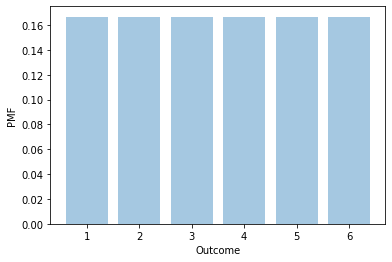

In [ ]:
die.bar(alpha=0.4)
plt.xlabel('Outcome')
plt.ylabel('PMF')

If we roll two dice and add them up, there are 11 possible outcomes, 2 through 12, but they are not equally likely. To compute the distribution of the sum, we have to enumerate the possible outcomes.

And that’s how this function works:

In [ ]:
def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum."""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

The parameters are Pmf objects representing distributions.

The loops iterate though the quantities and probabilities in the Pmf objects. Each time through the loop q gets the sum of a pair of quantities, and p gets the probability of the pair. Because the same sum might appear more than once, we have to add up the total probability for each sum.

Notice a subtle element of this line:

```python:
 res[q] = res(q) + p
```

I use parentheses on the right side of the assignment, which returns 0 if q does not appear yet in res. I use brackets on the left side of the assignment to create or update an element in res; using parentheses on the left side would not work.

Pmf provides add_dist, which does the same thing. You can call it as a method, like this:

In [ ]:
twice = die.add_dist(die)

Or as a function like this:

In [ ]:
twice = Pmf.add_dist(die, die)

Text(0, 0.5, 'PMF')

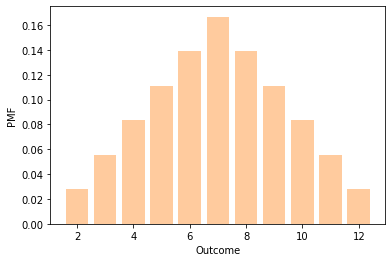

In [ ]:
twice.bar(color='C1',alpha=0.4)
plt.xlabel('Outcome')
plt.ylabel('PMF')

If we have a sequence of Pmf objects that represent dice, we can compute the distribution of the sum like this:

In [ ]:
def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

In [ ]:
dice = [die] * 3

In [ ]:
thrice = add_dist_seq(dice)

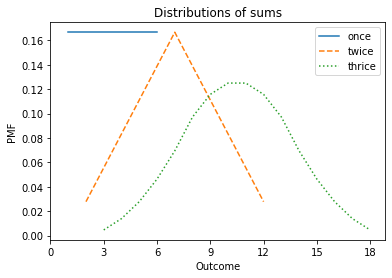

In [ ]:
die.plot()
twice.plot(style='--')
thrice.plot(style=':')
plt.xticks([0,3,6,9,12,15,18])
plt.title('Distributions of sums')
plt.xlabel('Outcome')
plt.ylabel('PMF')
plt.legend(['once','twice','thrice'])

As an aside, this example demonstrates the Central Limit Theorem, which says that the distribution of a sum converges on a bell-shaped normal distribution, at least under some conditions.

# **Gluten Sensitivity**
In 2015 I read a paper that tested whether people diagnosed with gluten sensitivity (but not celiac disease) were able to distinguish gluten flour from non-gluten flour in a blind challenge ([you can read the paper here](https://onlinelibrary.wiley.com/doi/full/10.1111/apt.13372)).

Out of 35 subjects, 12 correctly identified the gluten flour based on resumption of symptoms while they were eating it. Another 17 wrongly identified the gluten-free flour based on their symptoms, and 6 were unable to distinguish.

The authors conclude, “Double-blind gluten challenge induces symptom recurrence in just one-third of patients.”

This conclusion seems odd to me, because if none of the patients were sensitive to gluten, we would expect some of them to identify the gluten flour by chance. So here’s the question: based on this data, how many of the subjects are sensitive to gluten and how many are guessing?

We can use Bayes’s Theorem to answer this question, but first we have to make some modeling decisions. I’ll assume:

* People who are sensitive to gluten have a 95% chance of correctly identifying gluten flour under the challenge conditions, and

* People who are not sensitive have a 40% chance of identifying the gluten flour by chance (and a 60% chance of either choosing the other flour or failing to distinguish).

These particular values are arbitrary, but the results are not sensitive to these choices.

I will solve this problem in two steps. 
1. First, assuming that we know how many subjects are sensitive, I will compute the distribution of the data. 
2. Then, using the likelihood of the data, I will compute the posterior distribution of the number of sensitive patients.

The first is **the forward problem** ; the second is **the inverse problem** .

# **The Forward Problem**
Suppose we know that 10 of the 35 subjects are sensitive to gluten. That means that 25 are not:

In [1]:
n = 35 # number of total test subjects.
num_sensitive = 10
num_insensitive = n - num_sensitive

Each sensitive subject has a 95% chance of identifying the gluten flour, so the number of correct identifications follows a binomial distribution.

I’ll use `make_binomial`, which we defined in <<_TheBinomialDistribution>>, to make a `Pmf` that represents the binomial distribution.

In [6]:
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [10]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

In [11]:
dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

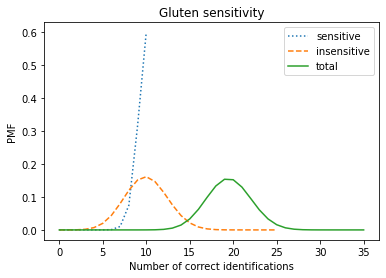

In [16]:
dist_sensitive.plot(label='sensitive', style=':')
dist_insensitive.plot(label='insensitive', style='--')
dist_total.plot(label='total')

plt.xlabel('Number of correct identifications')
plt.ylabel('PMF')
plt.title('Gluten sensitivity')
plt.legend(['sensitive','insensitive','total'])

We expect most of the sensitive subjects to identify the gluten flour correctly. Of the 25 insensitive subjects, we expect about 10 to identify the gluten flour by chance. So we expect about 20 correct identifications in total.

This is the answer to the forward problem: given the number of sensitive subjects, we can compute the distribution of the data.

# **The Inverse Problem**
Now let’s solve the inverse problem: given the data, we’ll compute the posterior distribution of the number of sensitive subjects.

Here’s how. I’ll loop through the possible values of `num_sensitive` and compute the distribution of the data for each:

In [17]:
import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total

In [18]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41
3,3.333724e-05,9.326490e-06,2.205654e-06,4.377061e-07,7.398116e-08,1.107854e-08,1.517139e-09,1.942513e-10,2.361331e-11,2.754929e-12,...,2.784933e-29,2.596024e-30,2.410204e-31,2.229314e-32,2.054801e-33,1.887764e-34,1.728997e-35,1.579030e-36,1.438169e-37,1.306534e-38
4,1.777986e-04,6.138285e-05,1.841174e-05,4.734794e-06,1.038280e-06,1.962745e-07,3.288580e-08,5.013120e-09,7.095823e-10,9.468298e-11,...,3.089268e-27,2.998031e-28,2.893328e-29,2.777860e-30,2.654159e-31,2.524558e-32,2.391168e-33,2.255871e-34,2.120317e-35,1.985931e-36


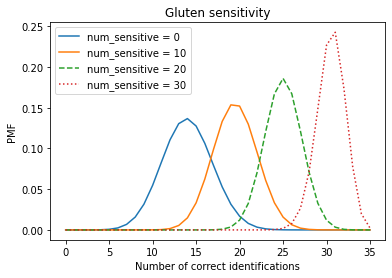

In [24]:
table[0].plot()
table[10].plot()
table[20].plot(style='--')
table[30].plot(style=':')
plt.xlabel('Number of correct identifications')
plt.ylabel('PMF')
plt.title('Gluten sensitivity')
plt.legend(['num_sensitive = 0','num_sensitive = 10','num_sensitive = 20','num_sensitive = 30'])

Now we can use the table to compute likelihood:

In [25]:
likelihood1 = table.loc[12]

loc selects a row from the DataFrame. The row with index 12 contains the probability of 12 correct identifications for each hypothetical value of num_sensitive. And that’s exactly the likelihood we need to do a Bayesian update.

I’ll use a uniform prior, which implies that I would be equally surprised by any value of `num_sensitive`:

In [26]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

And here’s the update:

In [27]:
posterior1 = prior * likelihood1
posterior1.normalize()

0.47547416486150873

In [28]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887313

Text(0.5, 1.0, 'Posterior distributions')

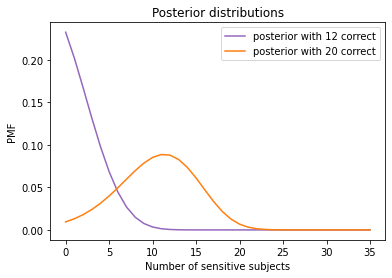

In [29]:
posterior1.plot(color='C4')
posterior2.plot(color='C1')
plt.legend(['posterior with 12 correct','posterior with 20 correct'])
plt.xlabel('Number of sensitive subjects')
plt.ylabel('PMF')
plt.title('Posterior distributions')

With 12 correct identifications, the most likely conclusion is that none of the subjects are sensitive to gluten. If there had been 20 correct identifications, the most likely conclusion would be that 11-12 of the subjects were sensitive.

In [30]:
posterior1.max_prob()

0

In [31]:
posterior2.max_prob()

11

**Remarks**
---
In this chapter it has been made clear that the odds and addends are two different and unrelated subjects. Odds are more useful to calculate situations in favour of a hypothesis or against to reach a final conclusion which is nothing short of being hypothetical ofcourse.

Addends are a way to add numerous distributions and calculate posterior to find out whether it converges into a bell shaped curve and then decide what is more likely to happen based on the data. 

Two problems have been discussed one is the Forward Problem which is to feed the data with hypothetical numbers and find the binomial distribution 

& 

the other is the Inversed Problem that works on the basis of correct inferences to calculate the number of a specific subject in the distribution.